In [1]:
import bst

class Splay(bst.BST):
    def __init__(self):
        super(Splay, self).__init__()

    def splay(self, x):
        while x != self.root:
            if x == x.parent.right:
                if x.parent == self.root:
                    self.left_rotate(x.parent)
                elif x.parent == x.parent.parent.right:
                    self.left_rotate(x.parent.parent)
                    self.left_rotate(x.parent)
                else:
                    assert x.parent == x.parent.parent.left
                    self.left_rotate(x.parent)
                    self.right_rotate(x.parent)
            else:
                assert x == x.parent.left
                if x.parent == self.root:
                    self.right_rotate(x.parent)
                elif x.parent == x.parent.parent.left:
                    self.right_rotate(x.parent.parent)
                    self.right_rotate(x.parent)
                else:
                    assert x.parent == x.parent.parent.right
                    self.right_rotate(x.parent)
                    self.left_rotate(x.parent)

    def _insert(self, key, node):
        if key < node.key:
            if node.left:
                self._insert(key, node.left)
            else:
                node.left = bst.Node(key, parent=node)
                self.splay(node.left)
        else:
            if node.right:
                self._insert(key, node.right)
            else:
                node.right = bst.Node(key, parent=node)
                self.splay(node.right)

    def _search(self, key, node):
        if not node:
            return False
        elif key == node.key:
            self.splay(node)
            return True
        elif key < node.key:
            return self._search(key, node.left)
        else:
            return self._search(key, node.right)

    def _remove(self, z):
        if z.left == None:
            self.transplant(z, z.right)
        elif z.right == None:
            self.transplant(z, z.left)
        else:
            y = self.get_min(z.right)
            if y.parent != z:
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y

In [2]:
class Node:
    def __init__(self, key, left=None, right=None, parent=None):
        self.left = left
        self.right = right
        self.key = key
        self.parent = parent

class BST:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root:
            self._insert(key, self.root)
        else:
            self.root = Node(key)

    def _insert(self, key, node):
        if key < node.key:
            if node.left:
                self._insert(key, node.left)
            else:
                node.left = Node(key, parent=node)
        else:
            if node.right:
                self._insert(key, node.right)
            else:
                node.right = Node(key, parent=node)

    def print_root(self):
        print("root is ", end='')
        print(self.root.key)

    def get_node(self, key, node):
        if key == node.key:
            return node
        elif key < node.key:
            return self.get_node(key, node.left)
        else:
            return self.get_node(key, node.right)

    def remove(self, key):
        self._remove(self.get_node(key, self.root))

    def transplant(self, u, v):
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v

        if v != None:
            v.parent = u.parent

    def get_min(self, root):
        x = root
        while x.left != None:
            x = x.left
        return x

    def _remove(self, z):
        tosplay = None
        if z.left == None:
            self.transplant(z, z.right)
        elif z.right == None:
            self.transplant(z, z.left)
        else:
            y = self.get_min(z.right)
            if y.parent != z:
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y

    def height(self):
        return self._height(self.root)

    def _height(self, node):
        if not node:
            return 0

        lheight = self._height(node.left)
        rheight = self._height(node.right)
        return max(lheight, rheight) + 1

    def search(self, key):
        return self._search(key, self.root)

    def _search(self, key, node):
        if not node:
            return False
        elif key == node.key:
            return True
        elif key < node.key:
            return self._search(key, node.left)
        else:
            return self._search(key, node.right)

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != None:
            y.left.parent = x
        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y
        
    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != None:
            y.right.parent = x
        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def inorder(self):
        self._inorder(self.root)
        print()

    def _inorder(self, node):
        if node:
            self._inorder(node.left)
            print(node.key, end=' ')
            self._inorder(node.right)

In [3]:
import bst
import splay
import random
import time

MAX = 10000
NUM_ROUNDS = 10

def gen_accesses(n):
    accesses = []
    for i in range(n):
        accesses.append(random.randint(0, MAX))
    return accesses

def insertions(data, tree):
    for datum in data:
        tree.insert(datum)

def accesses(accs, tree):
    for a in accs:
        tree.search(a)

def deletions(ds, tree):
    for d in ds:
        tree.remove(d)

avg_uni_b = 0
avg_pretty_uneven_b4 = 0
avg_pretty_uneven_b10 = 0
avg_very_uneven_b = 0
avg_inter_b = 0
avg_del_b = 0

In [4]:
import matplotlib.pyplot as plt

In [5]:
def insertions1(data,tree):
    start = time.process_time()
    x=[0];
    i=0;
    tt=[];
    for datum in data:
        tree.insert(datum)
        i+=1;
        x.append(i);
        tt.append(time.process_time()-start);
    plt.plot(x,tt);
    plt.xlabel("Numbers inserted");
    plt.ylabel("Time taken");
    
        
        

In [38]:
# b = bst.BST()
# s = splay.Splay()
# insertions1(data, b)
# insertions1(data, s)
data = random.sample(range(MAX), MAX)
def insertions1(data,tree,tree1):
    start = time.process_time()
    x=[];
    i=0;
    tt=[];
    for datum in data:
        tree.insert(datum)
        i+=1;
        x.append(i);
        tt.append(time.process_time()-start);
    plt.plot(x,tt,label="BST");
    start = time.process_time()
    x=[];
    i=0;
    tt=[];
    for datum in data:
        tree1.insert(datum)
        i+=1;
        x.append(i);
        tt.append(time.process_time()-start);
    plt.plot(x,tt,label="Splay tree");
    plt.xlabel("Numbers inserted");
    plt.ylabel("Time taken");
    plt.legend()
    plt.show()

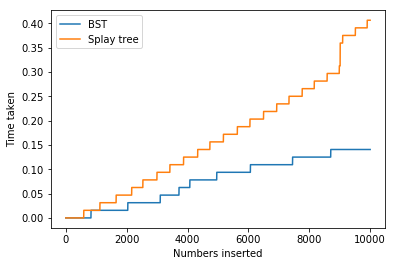

In [49]:
b = bst.BST()
s = splay.Splay()
insertions1(data, b, s)

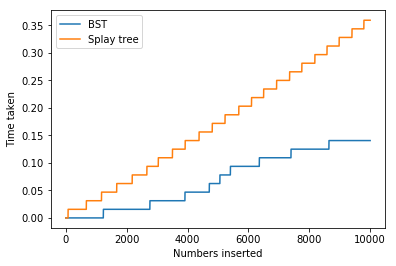

In [46]:
b = bst.BST()
s = splay.Splay()
insertions1(data, b, s)

In [40]:
dels = random.sample(data, 1000)
even_accesses = random.sample(data, MAX)
very_uneven_accesses = []
element = data[random.randint(0, MAX)]
for i in range(MAX):
    very_uneven_accesses.append(element)

pretty_uneven_accesses4 = []
base = random.randint(0, MAX - 4)
for i in range(MAX):
    pretty_uneven_accesses4.append(random.randint(base, base + 4))

pretty_uneven_accesses10 = []
base = random.randint(0, MAX - 10)
for i in range(MAX):
    pretty_uneven_accesses10.append(random.randint(base, base + 10))

In [23]:
def accesses1(accs, tree,tree1):
    x=[];
    i=0;
    tt=[];
    start = time.process_time()
    for a in accs:
        tree.search(a)
        i+=1;
        x.append(i);
        tt.append(time.process_time()-start);
    plt.plot(x,tt,label="BST");
    x=[];
    i=0;
    tt=[];
    start = time.process_time()
    for a in accs:
        tree1.search(a)
        i+=1;
        x.append(i);
        tt.append(time.process_time()-start);
    plt.plot(x,tt,label="Splay tree");
    plt.xlabel("No. of Numbers searched");
    plt.ylabel("Time taken");
    plt.legend()
    plt.show()

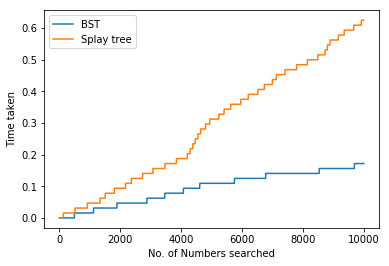

In [41]:
accesses1(even_accesses, b,s)

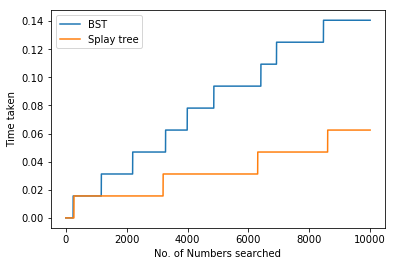

In [43]:
accesses1(pretty_uneven_accesses4, b, s)

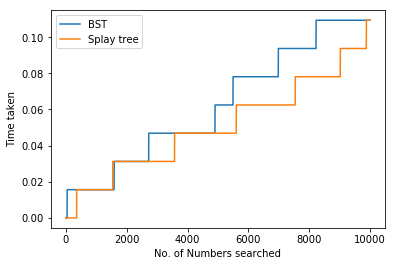

In [45]:
accesses1(pretty_uneven_accesses10, b, s)

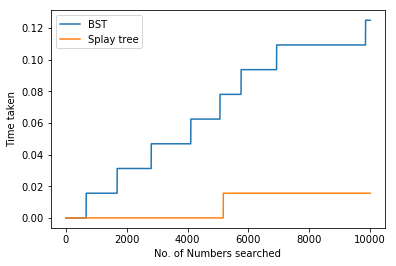

In [47]:
accesses1(very_uneven_accesses, b, s)

In [28]:
def deletions1(ds, tree,tree1):
    x=[];
    i=0;
    tt=[];
    start = time.process_time()
    for d in ds:
        tree.remove(d)
        i+=1;
        x.append(i);
        tt.append(time.process_time()-start);
    plt.plot(x,tt,label="BST");
    x=[];
    i=0;
    tt=[];
    start = time.process_time()
    for d in ds:
        tree1.remove(d)
        i+=1;
        x.append(i);
        tt.append(time.process_time()-start);
    plt.plot(x,tt,label="Splay tree");
    plt.xlabel("No. of Numbers deleted");
    plt.ylabel("Time taken");
    plt.legend()
    plt.show()

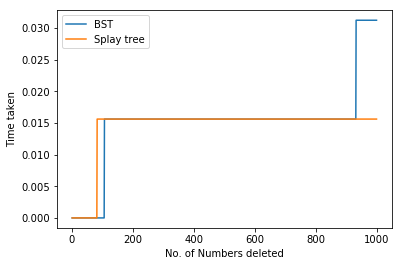

In [50]:
deletions1(dels, b,s)